In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw,ImageFont
import numpy as np

import warnings
warnings.filterwarnings('ignore')

image_dir = "data/pics"

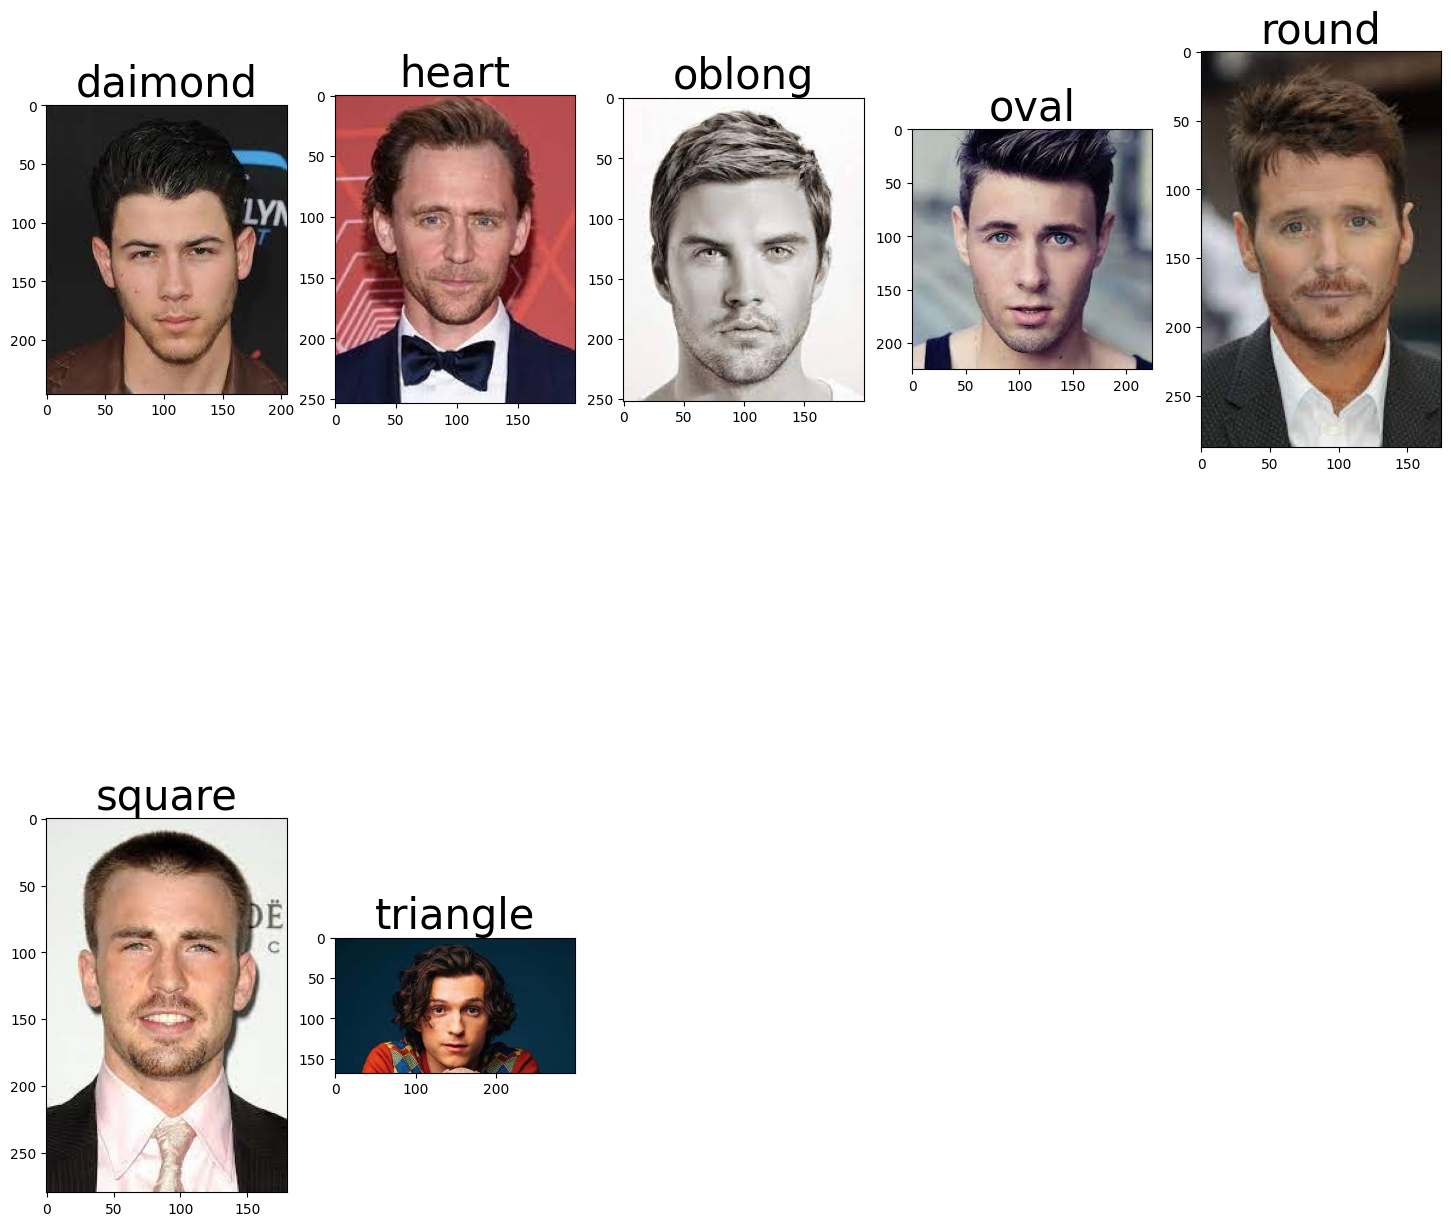

In [2]:
plt.figure(figsize = (18,18))

examples = ['data/pics/diamond/download (1).jpg', 
            'data/pics/heart/download (1).jpg', 
            'data/pics/oblong/download (1).jpg',
            'data/pics/oval/download (1).jpg',
            'data/pics/round/download (1).jpg',
            'data/pics/square/download (1).jpg',
            'data/pics/triangle/download (1).jpg']

names = ['daimond','heart','oblong','oval','round', 'square', 'triangle']
            
for i in range(0,len(examples)):
    plt.subplot(2,5,i+1)
    img = Image.open(examples[i])
    draw = ImageDraw.Draw(img)
    plt.imshow(img)
    plt.title(names[i],fontsize= 30)
    img.close()

In [3]:
df = pd.DataFrame(columns = ['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143','A1','A2','A3','A4','A5','A6','A7','A8','A9',
                            'A10','A11','A12','A13','A14','A15','A16','Width','Height','H_W_Ratio','Jaw_width','J_F_Ratio',
                             'MJ_width','MJ_J_width'])

In [4]:
data = pd.read_csv("all_features.csv")

In [5]:
%run -i functions_only.py    # This calls my main functions (make_face_df, Distance, ScaleRotateTranslate)

<Figure size 640x480 with 0 Axes>

In [6]:
# # You can only use this code if Dataframe file (all_features.csv) is not available.
# # make df to store name of shape
      
# import os
# import pathlib

# from functions_only import make_face_df


# data = pd.DataFrame()
# data.reset_index
# shape_df = pd.DataFrame(columns = ['filenum','filename','classified_shape'])
# shape_array = []
# def store_features_and_classification():
#     filenum = -1
#     sub_dir = [q for q in pathlib.Path(image_dir).iterdir() if q.is_dir()]
#     start_j = 0
#     end_j = len(sub_dir)

#     for j in range(start_j, end_j):
#         images_dir = [p for p in pathlib.Path(sub_dir[j]).iterdir() if p.is_file()]

#         for p in pathlib.Path(sub_dir[j]).iterdir():
#             print(p)

#             shape_array= []
#             if 1 == 1:
#                     face_file_name = os.path.basename(p)
#                     classified_face_shape = os.path.basename(os.path.dirname(p)) 
#                     filenum += 1
#                     make_face_df(p,filenum, df)
#                     shape_array.append(filenum)
#                     shape_array.append(face_file_name)  
#                     shape_array.append(classified_face_shape)
#                     shape_df.loc[filenum] = np.array(shape_array)
            
            
# store_features_and_classification()  
# data = pd.concat([df, shape_df], axis=1)

In [7]:
# Add all the faces features with shape to a DATA CSV file for model purpose.
# data.to_csv('all_features.csv')

In [8]:
%run -i functions_only_save.py    # This calls my 2nd function for Recommendation Purpose

In [9]:
# load data file
# start here
# data = pd.read_csv('all_features.csv',index_col = None)
data = data.drop('Unnamed: 0',axis = 1)
# data.shape

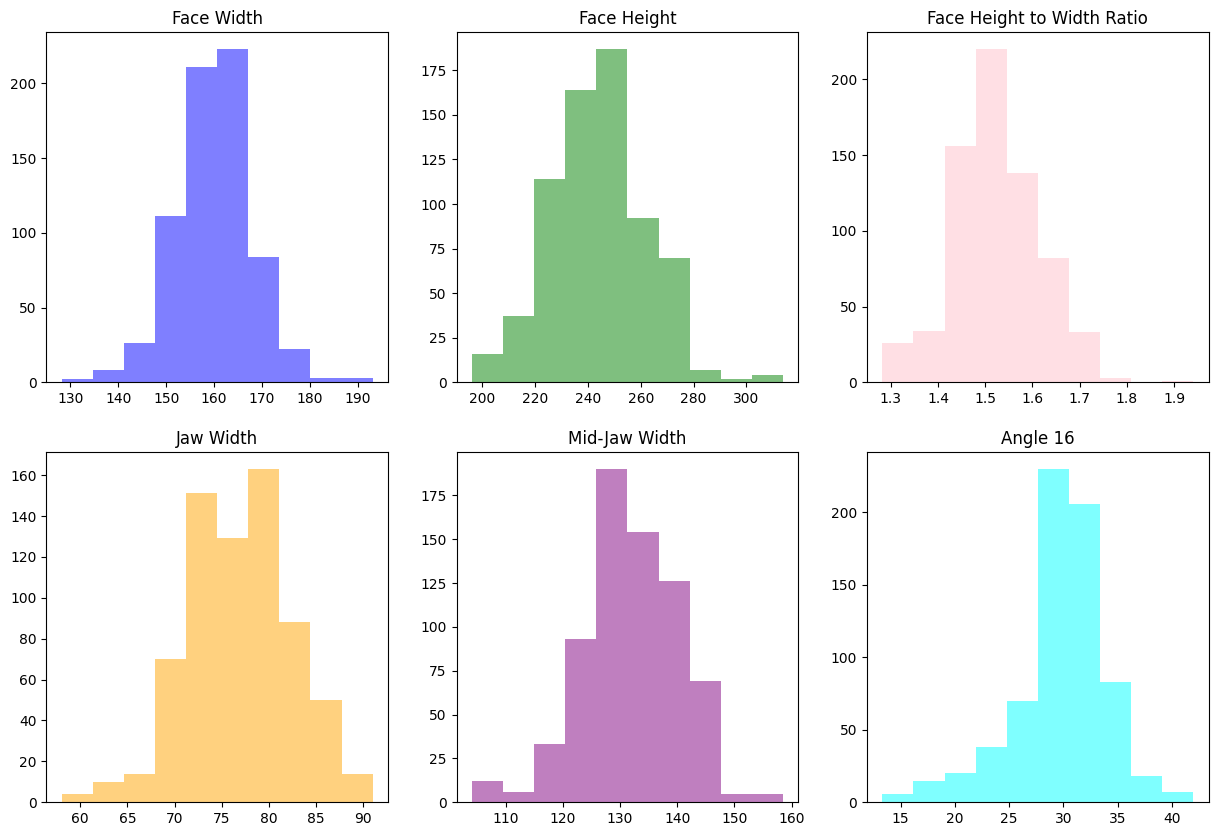

In [10]:
xclean = data.dropna(axis=0, how='any')
plt.figure(figsize=(15,10)) 

plt.subplot(2,3,1)
plt.hist(xclean['Width'], 10, facecolor='blue', alpha=0.5)
plt.title('Face Width')

plt.subplot(2,3,2)
plt.hist(xclean['Height'], 10, facecolor='green', alpha=0.5)
plt.title('Face Height')

plt.subplot(2,3,3)
plt.hist(xclean['H_W_Ratio'], 10, facecolor='pink', alpha=0.5)
plt.title('Face Height to Width Ratio')

plt.subplot(2,3,4)
plt.hist(xclean['Jaw_width'], 10, facecolor='orange', alpha=0.5)
plt.title('Jaw Width')

plt.subplot(2,3,5)
plt.hist(xclean['MJ_width'], 10, facecolor='purple', alpha=0.5)
plt.title('Mid-Jaw Width')

plt.subplot(2,3,6)
plt.hist(xclean['A16'], 10, facecolor='aqua', alpha=0.5)
plt.title('Angle 16')

plt.show()

In [11]:
from scipy import stats

S1 = []
S2 = []
S1S2 = []
p_value = []
t_tests = pd.DataFrame() 
labels = ['daimond','heart','oblong','oval','round','square','triangle']


for i in range(0,4):
    for j in range(0,4):
        t = (stats.ttest_ind(xclean[xclean.classified_shape == labels[i] ].Width, xclean[xclean.classified_shape == labels[j+1]].Width))
        p_value.append(t.pvalue)
        S1.append(labels[i])
        S2.append(labels[j+1])   
t_tests['S1'] = S1
t_tests['S2'] = S2
t_tests["test"] = t_tests["S1"].map(str) + ':' + t_tests["S2"]
t_tests['p_value'] = p_value

t_tests = t_tests[t_tests.S1 != t_tests.S2]

In [12]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val < 0.05 else 'black'
    return 'color: %s' % color

s = t_tests.style.applymap(color_negative_red,subset=pd.IndexSlice[:, ['p_value']])
s

,S1,S2,test,p_value
0,daimond,heart,daimond:heart,nan
1,daimond,oblong,daimond:oblong,nan
2,daimond,oval,daimond:oval,nan
3,daimond,round,daimond:round,nan
5,heart,oblong,heart:oblong,0.039243
6,heart,oval,heart:oval,0.799349
7,heart,round,heart:round,0.000000
8,oblong,heart,oblong:heart,0.039243
10,oblong,oval,oblong:oval,0.060547
11,oblong,round,oblong:round,0.000000


In [13]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import ensemble
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA 

In [15]:
data_clean = data.dropna(axis=0, how='any')
X = data_clean
X = X.drop(['filenum','filename','classified_shape'] , axis = 1)
X_norm = normalize(X)
Y = data_clean['classified_shape']

In [16]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [17]:
import joblib

In [18]:
scaler = StandardScaler()  
scaler.fit(X)  

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

X = scaler.transform(X)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,
    test_size=0.25,
    random_state=1200)

In [20]:
n_components = 18
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)

# Save the PCA (if used)
joblib.dump(pca, 'pca.pkl')

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [21]:
# #Remove PCA 
X_train_pca = X_train
X_test_pca = X_test

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
import itertools

mlp = MLPClassifier(hidden_layer_sizes=(60,10,60,30), solver='sgd',shuffle  = True, 
                    learning_rate_init=0.01, max_iter = 200,warm_start  = False)

from sklearn.model_selection import RandomizedSearchCV 
param_grid = { 
    'learning_rate_init':[0.01]   # always the best
    ,'hidden_layer_sizes': [x for x in itertools.product((10,20,30,40,50,60,100),repeat=4)]
    ,'max_iter': [100] # always the best
    ,'random_state': [525]
}

random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, cv= 5, n_iter = 50)
random_search.fit(X_train_pca, Y_train)
print(random_search.best_estimator_)

MLPClassifier(hidden_layer_sizes=(100, 30, 50, 100), learning_rate_init=0.01,
              max_iter=100, random_state=525, solver='sgd')


In [24]:
# With best model tuning

best_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 100, 30, 100), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=525,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
best_mlp.fit(X_train_pca, Y_train)

MLPClassifier(hidden_layer_sizes=(60, 100, 30, 100), learning_rate_init=0.01,
              max_iter=100, random_state=525, solver='sgd')

In [25]:
# Save the trained model
joblib.dump(best_mlp, 'face_shape_model.pkl')

['face_shape_model.pkl']

In [26]:
print(best_mlp.score(X_train_pca, Y_train))
mlp_score = best_mlp.score(X_test_pca,Y_test)
print(mlp_score)

1.0
0.9425287356321839


In [27]:
y_pred = best_mlp.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

     diamond       0.93      0.93      0.93        30
       heart       0.96      0.92      0.94        26
      oblong       0.88      0.97      0.92        30
        oval       0.96      0.88      0.92        25
       round       0.94      1.00      0.97        17
      square       1.00      0.95      0.97        19
    triangle       0.96      0.96      0.96        27

    accuracy                           0.94       174
   macro avg       0.95      0.94      0.95       174
weighted avg       0.94      0.94      0.94       174



In [28]:
import functions_only_save as fos

In [29]:
my_photo = 'data/kanula.jpg'
file_num = 2035
fos.make_face_df_save(my_photo,file_num,df)

In [30]:
# scaler = StandardScaler()
dfc = df
test_row = dfc.loc[file_num].values.reshape(1, -1)
test_row = scaler.transform(test_row)  
test_shape = best_mlp.predict(test_row)
print(test_shape)


['oval']


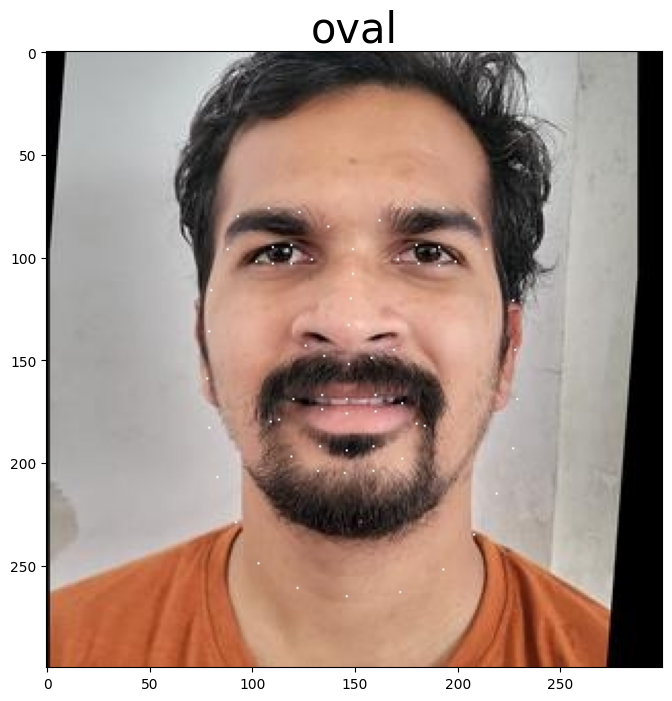

In [31]:
plt.figure(figsize = (8,8))
new_photo = my_photo+'_NEW_rotated_pts.jpg'
img = Image.open(new_photo)
draw = ImageDraw.Draw(img)
plt.title(test_shape[0], fontsize = 30)
plt.imshow(img)
img.close()

In [32]:
dfc.head()

,0,1,2,3,4,5,6,7,8,9,...,A14,A15,A16,Width,Height,H_W_Ratio,Jaw_width,J_F_Ratio,MJ_width,MJ_J_width
2035,80.0,116.0,79.0,136.0,78.0,159.0,79.0,183.0,83.0,207.0,...,40.846147,34.346097,29.357754,147.085009,314.05732,2.13521,90.049986,0.612231,136.235091,1.512883


In [33]:
%run -i recommender.py

<Figure size 640x480 with 0 Axes>

In [34]:
import recommender as rec

Hello, nil.
Updo
oval


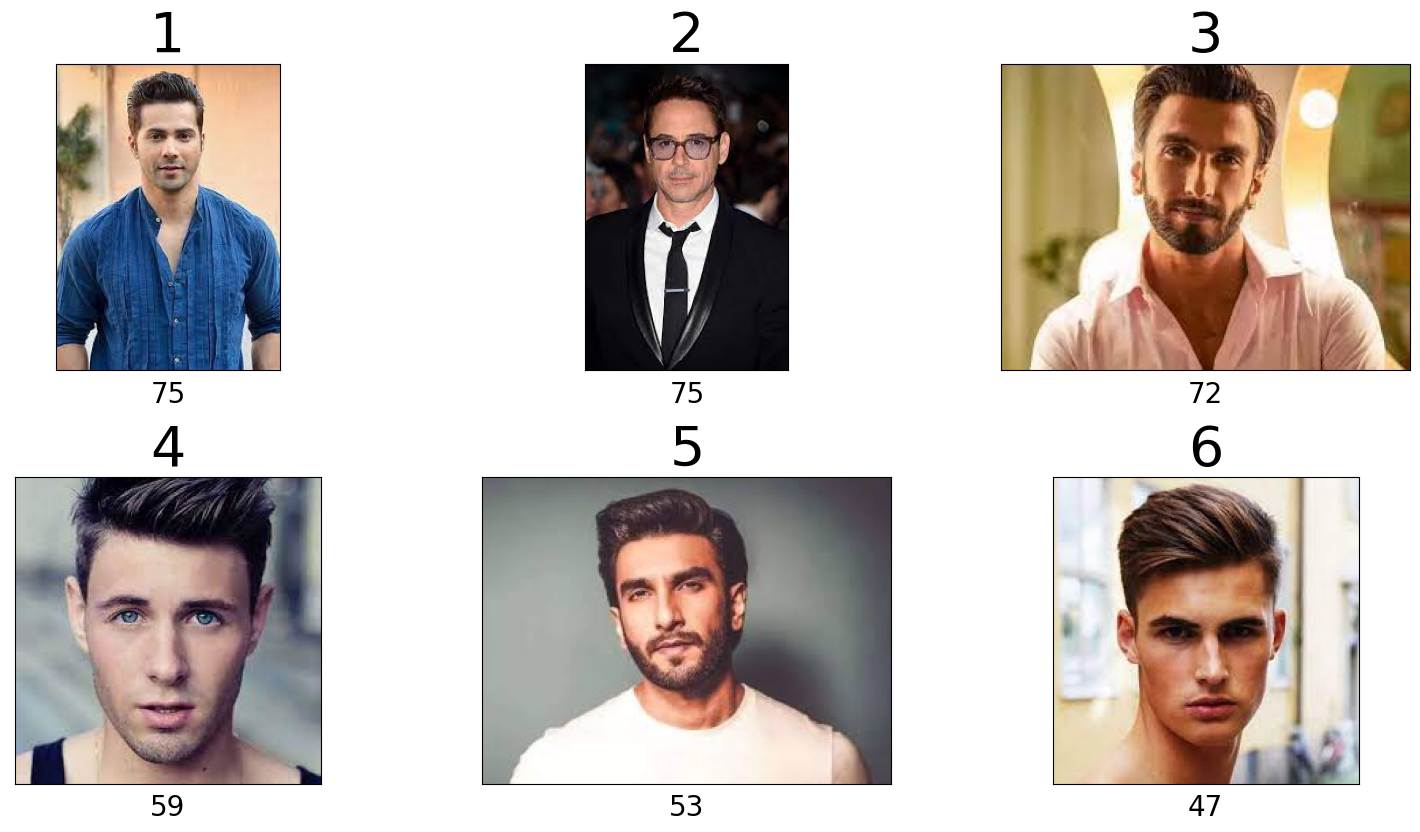

In [35]:
rec.run_recommender(test_shape[0])